In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! pip install keras

In [3]:
! pip install tensorflow

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

from sklearn.preprocessing import MinMaxScaler

In [44]:
df = pd.read_csv('HistoricalData_apple.csv')

In [45]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,03/08/2023,$152.87,47204790,$152.81,$153.47,$151.83
1,03/07/2023,$151.60,56182030,$153.70,$154.0299,$151.13
2,03/06/2023,$153.83,87558030,$153.785,$156.30,$153.46
3,03/03/2023,$151.03,70732300,$148.045,$151.11,$147.33
4,03/02/2023,$145.91,52279760,$144.38,$146.71,$143.90


In [46]:
df.tail()

,Date,Close/Last,Volume,Open,High,Low
246,03/15/2022,$155.09,92964300,$150.90,$155.57,$150.38
247,03/14/2022,$150.62,108732100,$151.45,$154.12,$150.10
248,03/11/2022,$154.73,96970100,$158.93,$159.28,$154.50
249,03/10/2022,$158.52,105342000,$160.20,$160.39,$155.98
250,03/09/2022,$162.95,91454910,$161.475,$163.41,$159.41


In [47]:
df = df[['Date', 'Close/Last']]
df.head()

,Date,Close/Last
0,03/08/2023,$152.87
1,03/07/2023,$151.60
2,03/06/2023,$153.83
3,03/03/2023,$151.03
4,03/02/2023,$145.91


In [48]:
df.dtypes

Date          object
Close/Last    object
dtype: object

In [49]:
df = df.replace({'\$':''}, regex = True)

In [50]:
df = df.astype({"Close/Last": float})
df["Date"] = pd.to_datetime(df.Date, format="%m/%d/%Y")
df.dtypes

Date          datetime64[ns]
Close/Last           float64
dtype: object

In [51]:
df.index = df['Date']

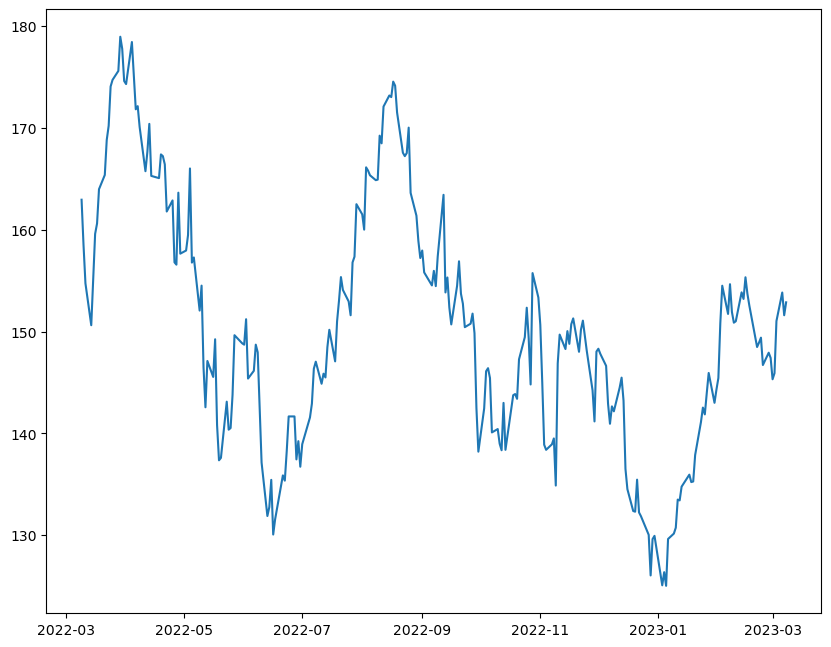

In [52]:
plt.figure(figsize=(10,8), dpi=100)
plt.plot(df["Close/Last"],label='Close Price history');

In [53]:
df.shape

(251, 2)

In [54]:
df = df.sort_index(ascending=True,axis=0)
df

,Date,Close/Last
Date,,
2022-03-09,2022-03-09,162.95
2022-03-10,2022-03-10,158.52
2022-03-11,2022-03-11,154.73
2022-03-14,2022-03-14,150.62
2022-03-15,2022-03-15,155.09
...,...,...
2023-03-02,2023-03-02,145.91
2023-03-03,2023-03-03,151.03
2023-03-06,2023-03-06,153.83


In [55]:
#data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close/Last'])
#for i in range(0,len(data)):
    #data["Date"][i]=df['Date'][i]
    #d#ata["Close/Last"][i]=df["Close/Last"][i]
#data

In [56]:
scaler=MinMaxScaler(feature_range=(0,1))
#data.index=data.Date
#data M^me chose que df !!!!!

In [57]:
df.drop('Date', axis=1,inplace=True)


In [58]:
final_data = df.values
train_data= pd.DataFrame(final_data[0:200,:], columns=['values'])
valid_data= pd.DataFrame(final_data[200:,:], columns=['values'])


In [59]:
final_data

array([[162.95],
       [158.52],
       [154.73],
       [150.62],
       [155.09],
       [159.59],
       [160.62],
       [163.98],
       [165.38],
       [168.82],
       [170.21],
       [174.07],
       [174.72],
       [175.6 ],
       [178.96],
       [177.77],
       [174.61],
       [174.31],
       [178.44],
       [175.06],
       [171.83],
       [172.14],
       [170.09],
       [165.75],
       [167.66],
       [170.4 ],
       [165.29],
       [165.07],
       [167.4 ],
       [167.23],
       [166.42],
       [161.79],
       [162.88],
       [156.8 ],
       [156.57],
       [163.64],
       [157.65],
       [157.96],
       [159.48],
       [166.02],
       [156.77],
       [157.28],
       [152.06],
       [154.51],
       [146.5 ],
       [142.56],
       [147.11],
       [145.54],
       [149.24],
       [140.82],
       [137.35],
       [137.59],
       [143.11],
       [140.36],
       [140.52],
       [143.78],
       [149.64],
       [148.84],
       [148.71

In [60]:
final_data.shape

(251, 1)

In [61]:
train_data

,values
0,162.95
1,158.52
2,154.73
3,150.62
4,155.09
...,...
195,136.50
196,134.51
197,132.37
198,132.30


In [62]:
train_data.shape

(200, 1)

In [63]:
valid_data

,values
0,132.23
1,131.86
2,130.03
3,126.04
4,129.61
5,129.93
6,125.07
7,126.36
8,125.02
9,129.62


In [64]:
valid_data.shape

(51, 1)

In [65]:
scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(51,len(train_data)):
    x_train_data.append(scaled_data[i-51:i,0]) # 51 correspond au nombre de lignes dans valid data
    y_train_data.append(scaled_data[i,0])

In [66]:
x_train_data = pd.DataFrame(x_train_data)

In [67]:
y_train_data = pd.DataFrame(y_train_data)

In [68]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=40,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=40))
lstm_model.add(Dense(1))


In [69]:
model_data=final_data[len(final_data)-len(valid_data)-51:]
model_data

array([[138.98],
       [138.34],
       [142.99],
       [138.38],
       [142.41],
       [143.75],
       [143.86],
       [143.39],
       [147.27],
       [149.45],
       [152.34],
       [149.35],
       [144.8 ],
       [155.74],
       [153.34],
       [150.65],
       [145.03],
       [138.88],
       [138.38],
       [138.92],
       [139.5 ],
       [134.87],
       [146.87],
       [149.7 ],
       [148.28],
       [150.04],
       [148.79],
       [150.72],
       [151.29],
       [148.01],
       [150.18],
       [151.07],
       [148.11],
       [144.22],
       [141.17],
       [148.03],
       [148.31],
       [147.81],
       [146.63],
       [142.91],
       [140.94],
       [142.65],
       [142.16],
       [144.49],
       [145.47],
       [143.21],
       [136.5 ],
       [134.51],
       [132.37],
       [132.3 ],
       [135.45],
       [132.23],
       [131.86],
       [130.03],
       [126.04],
       [129.61],
       [129.93],
       [125.07],
       [126.36

In [70]:
model_data = model_data.reshape(-1,1)
model_data = scaler.transform(model_data)

In [71]:
model_data

array([[0.25880608],
       [0.24694105],
       [0.33314794],
       [0.24768261],
       [0.32239525],
       [0.34723767],
       [0.34927697],
       [0.34056359],
       [0.41249537],
       [0.45291064],
       [0.50648869],
       [0.45105673],
       [0.36670374],
       [0.56952169],
       [0.52502781],
       [0.47515758],
       [0.37096774],
       [0.25695217],
       [0.24768261],
       [0.25769373],
       [0.26844642],
       [0.18261031],
       [0.40507972],
       [0.45754542],
       [0.43121987],
       [0.46384872],
       [0.44067482],
       [0.47645532],
       [0.48702262],
       [0.42621431],
       [0.4664442 ],
       [0.48294401],
       [0.42806822],
       [0.35595106],
       [0.29940675],
       [0.42658509],
       [0.43177605],
       [0.42250649],
       [0.40063033],
       [0.33166481],
       [0.29514275],
       [0.32684464],
       [0.31776047],
       [0.36095662],
       [0.37912495],
       [0.33722655],
       [0.21282907],
       [0.175

In [72]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data, epochs=1,batch_size=1,verbose=2)


149/149 - 7s - loss: 0.0235 - 7s/epoch - 47ms/step


In [73]:
X_test=[]
for i in range(51,model_data.shape[0]):
    X_test.append(model_data[i-51:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [74]:
X_test

array([[[0.25880608],
        [0.24694105],
        [0.33314794],
        ...,
        [0.13626251],
        [0.13496478],
        [0.193363  ]],

       [[0.24694105],
        [0.33314794],
        [0.24768261],
        ...,
        [0.13496478],
        [0.193363  ],
        [0.13366704]],

       [[0.33314794],
        [0.24768261],
        [0.32239525],
        ...,
        [0.193363  ],
        [0.13366704],
        [0.12680756]],

       ...,

       [[0.13626251],
        [0.13496478],
        [0.193363  ],
        ...,
        [0.37615869],
        [0.38728217],
        [0.48220245]],

       [[0.13496478],
        [0.193363  ],
        [0.13366704],
        ...,
        [0.38728217],
        [0.48220245],
        [0.53411198]],

       [[0.193363  ],
        [0.13366704],
        [0.12680756],
        ...,
        [0.48220245],
        [0.53411198],
        [0.49276974]]])

In [75]:
X_test.shape

(51, 51, 1)

In [76]:
predicted_stock_price = lstm_model.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

2/2 [==============================] - 1s 16ms/step


In [77]:
valid_data['Predictions']=predicted_stock_price
valid_data

,values,Predictions
0,132.23,142.556198
1,131.86,141.620529
2,130.03,140.719986
3,126.04,139.807205
4,129.61,138.756775
5,129.93,137.840057
6,125.07,137.068375
7,126.36,136.216492
8,125.02,135.421082
9,129.62,134.643814


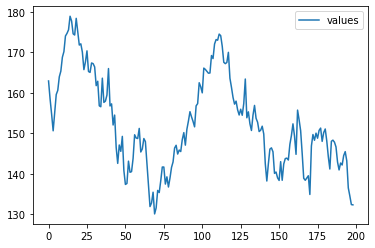

In [99]:
train_data = pd.DataFrame(final_data[:199],columns=['values'])
train_data.plot();

In [86]:
train_data

,values
0,162.95
1,158.52
2,154.73
3,150.62
4,155.09
...,...
195,136.50
196,134.51
197,132.37
198,132.30


In [98]:
valid_data= pd.DataFrame(final_data[200:],columns=['values'])
valid_data['Predictions']=predicted_stock_price
valid_data['Index'] = np.arange(200, 251, 1)
valid_data.set_index('Index', inplace=True)
valid_data

,values,Predictions
Index,,
200,132.23,142.556198
201,131.86,141.620529
202,130.03,140.719986
203,126.04,139.807205
204,129.61,138.756775
205,129.93,137.840057
206,125.07,137.068375
207,126.36,136.216492
208,125.02,135.421082


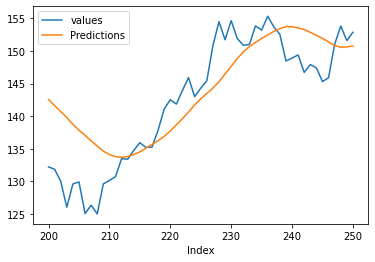

In [95]:
valid_data.plot();

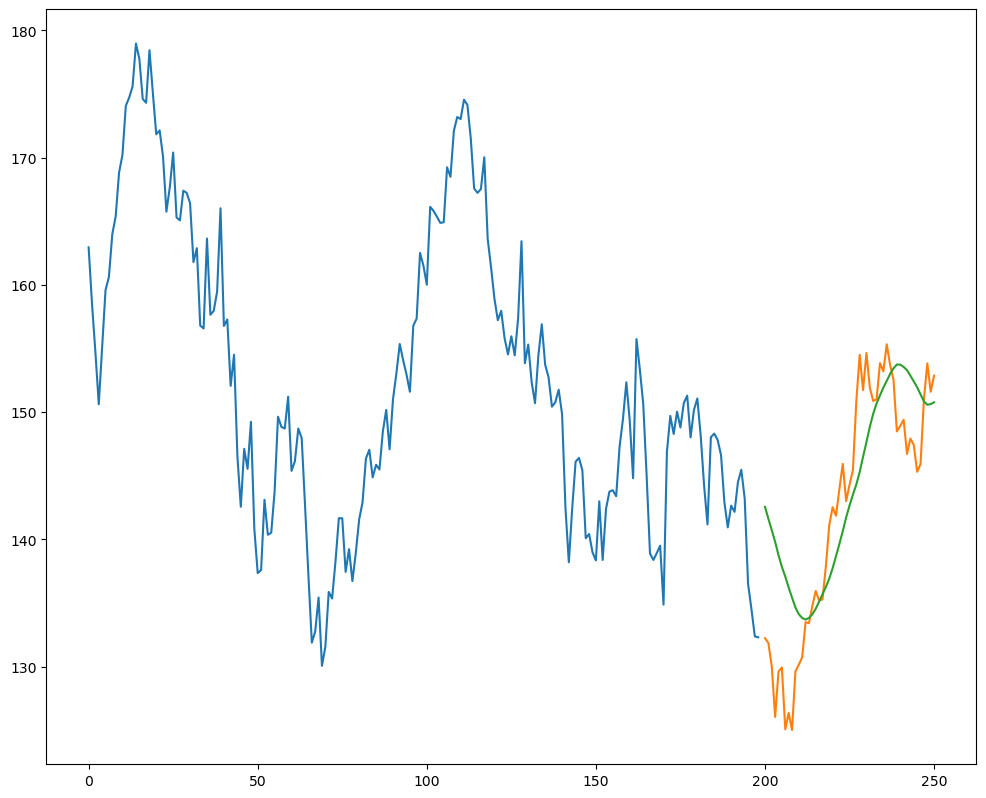

In [100]:
plt.figure(figsize=(12,10), dpi=100)
plt.plot(train_data["values"])
plt.plot(valid_data[['values',"Predictions"]]);